In [1]:
import numpy as np
import torch
import gym
import matplotlib.pyplot as plt

def one_hot(x):
    return torch.Tensor(np.identity(16)[x:x+1])


In [13]:
env = gym.make('FrozenLake-v1')
learning_late = 0.1

input_size = env.observation_space.n
output_size = env.action_space.n

W = torch.randn((input_size,output_size))
Qpred = torch.matmul

dis = .99
num_episodes = 2000
rList = []

torch.Size([16, 4])

In [19]:
for i in range(num_episodes):
    state = env.reset() #환경 초기화
    e = 1./ ((i / 50) + 10)
    rAll = 0
    done = False
    while not done:
        Qs = Qpred(one_hot(state),W)
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.long(np.argmax(Qs))
        new_state, reward, done, _ = env.step(action)
        if done:
            Qs[0,action] = reward
        else:
            Qs1 = Qpred(one_hot(new_state),W)
            Qs[0,action] = reward + dis * torch.max(Qs1)
        #train
        error = Qs - Qpred(one_hot(state),W)
        gradient_w = -np.transpose(one_hot(state)) @ error 
        print(gradient_w.shape)
            
        #16,4
        W -= learning_late * gradient_w 

        rAll += reward
        state = new_state
    rList.append(rAll)

torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])
torch.Size([16, 4])


Success rate: 0.4795
Final Q-Table Values
LEFT DOWN RIGHT UP
tensor([[0.5043, 1.0000, 0.6850, 0.5560]])


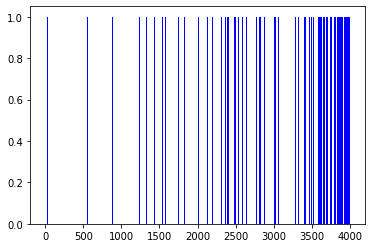

In [20]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Qs)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()